In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 

In [8]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram 

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('Mall_Customers.csv', sep=';')

In [34]:
data = pd.read_csv('Mall_Customers.csv')

In [22]:
data.head()


,"CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)"
0,"1,Male,19,15,39"
1,"2,Male,21,15,81"
2,"3,Female,20,16,6"
3,"4,Female,23,16,77"
4,"5,Female,31,17,40"
5,"6,Female,22,17,76"
6,"7,Female,35,18,6"
7,"8,Female,23,18,94"
8,"9,Male,64,19,3"
9,"10,Female,30,19,72"


In [46]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [24]:
data.describe()

,"CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)"
count,200
unique,200
top,"1,Male,19,15,39"
freq,1


Text(0.5, 1.0, 'Identificación de Datos Faltantes ')

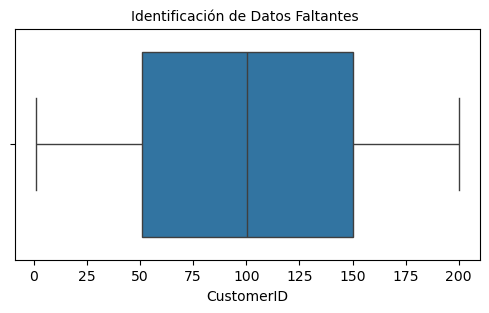

In [81]:
#Identificación de Datos Faltantes 
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['CustomerID']) #Recientes
plt.title('Identificación de Datos Faltantes ', fontsize=10 )

In [73]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


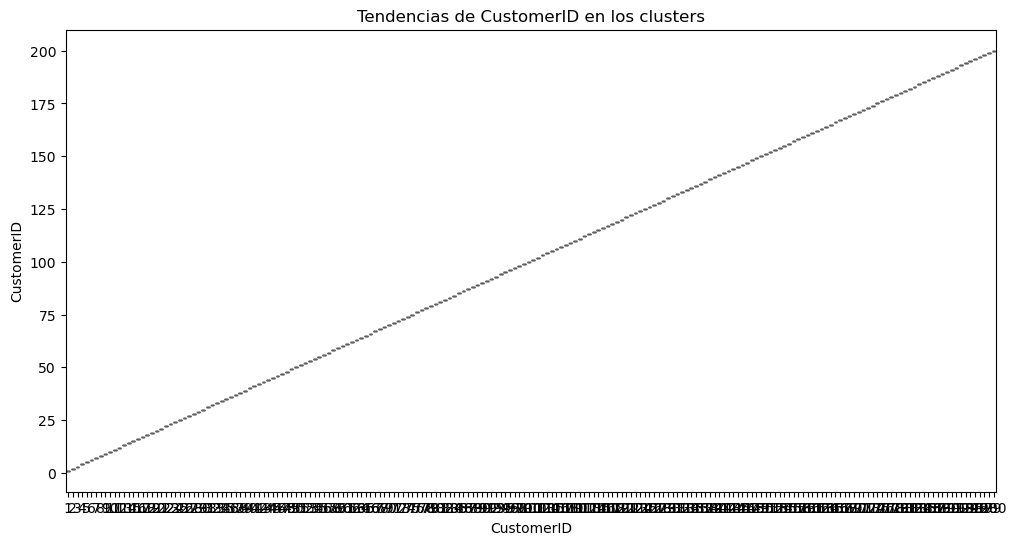

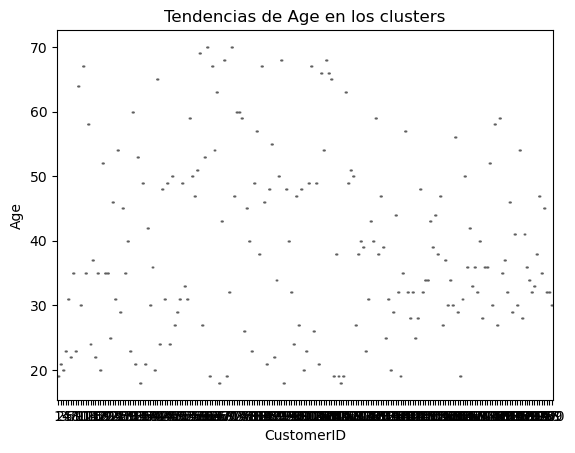

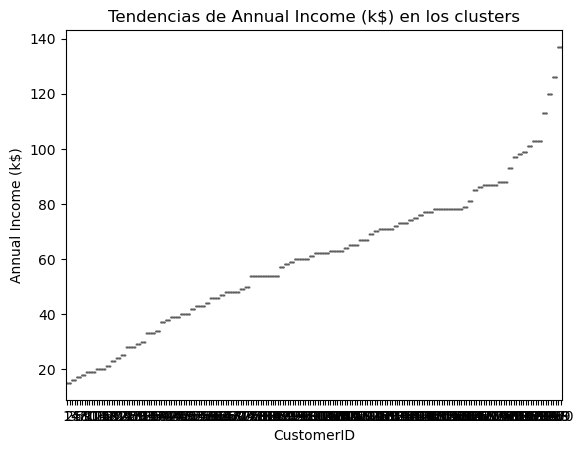

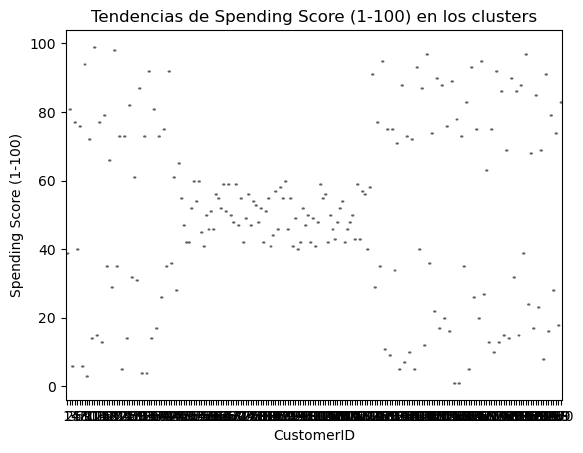

In [79]:
# Visualización de tendencias por cluster
plt.figure(figsize=(12, 6))
for col in numeric_cols.columns:
    sns.boxplot(x='CustomerID', y=col, data=data, palette='Set3')
    plt.title(f"Tendencias de {col} en los clusters")
    plt.show()

In [99]:
# Filtrar columnas del modelo 

data = data[["CustomerID","Gender","Age"]]  

In [103]:
# Revisión de los datos de las variables objetivo
data.head(10)

,CustomerID,Gender,Age
0,1,Male,19
1,2,Male,21
2,3,Female,20
3,4,Female,23
4,5,Female,31
5,6,Female,22
6,7,Female,35
7,8,Female,23
8,9,Male,64
9,10,Female,30


In [105]:
# Crear una lista para probar diferentes valores de hiperparámetros
n_clusters_list = [2, 3, 4, 5, 6]
init_methods = ['k-means++', 'random']
max_iter_values = [300, 500]
n_init_values = [10, 20]

In [107]:
# Variable para almacenar los resultados
results = []

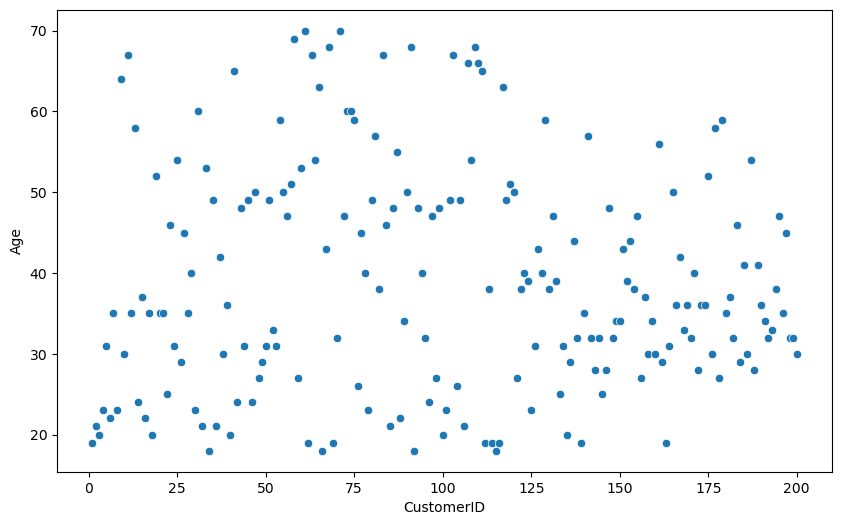

In [113]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['CustomerID'], y=data['Age'])
plt.title('')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

In [129]:
# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['CustomerID', 'Age']])  

In [131]:
# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)


In [133]:
# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")



Coeficiente de Silhouette: 0.40459610299983273
Índice de Calinski-Harabasz: 170.77493319923371


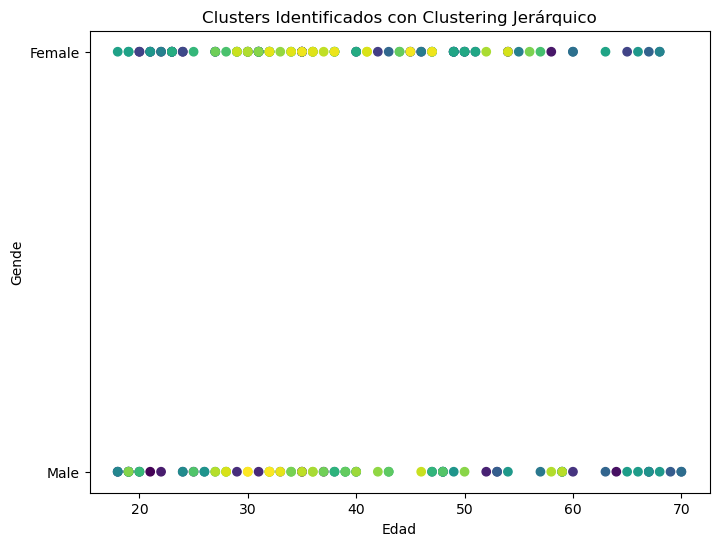

In [147]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Gender'], c=data['CustomerID'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Gende')
plt.show()


data = data[["CustomerID","Age"]]  
